In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('marketing_AB.csv')
df.head()

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


In [4]:
df.info()
df['test group'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588101 entries, 0 to 588100
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Unnamed: 0     588101 non-null  int64 
 1   user id        588101 non-null  int64 
 2   test group     588101 non-null  object
 3   converted      588101 non-null  bool  
 4   total ads      588101 non-null  int64 
 5   most ads day   588101 non-null  object
 6   most ads hour  588101 non-null  int64 
dtypes: bool(1), int64(4), object(2)
memory usage: 27.5+ MB


,count
test group,
ad,564577
psa,23524


In [6]:
control = df[df['test group'] == 'ad']
test = df[df['test group'] == 'psa']

In [8]:
control_rate = control['converted'].mean()
test_rate = test['converted'].mean()

print("Control Conversion Rate:", control_rate)
print("Test Conversion Rate:", test_rate)

Control Conversion Rate: 0.025546559636683747
Test Conversion Rate: 0.01785410644448223


In [9]:
alpha = 0.05
print("Alpha (Significance Level):", alpha)

Alpha (Significance Level): 0.05


In [11]:
contingency_table = pd.crosstab(df['test group'], df['converted'])
contingency_table

converted,False,True
test group,,
ad,550154,14423
psa,23104,420


In [12]:
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

print("Chi-square statistic:", chi2)
print("P-value:", p_value)

Chi-square statistic: 54.005823883685245
P-value: 1.9989623063390075e-13


In [13]:
if p_value <= alpha:
    print("Reject Null Hypothesis: Significant difference exists")
else:
    print("Fail to Reject Null Hypothesis: No significant difference")

Reject Null Hypothesis: Significant difference exists


In [15]:
control_conv = control['converted']
test_conv = test['converted']

diff = test_conv.mean() - control_conv.mean()

se = np.sqrt(
    (test_conv.var()/len(test_conv)) +
    (control_conv.var()/len(control_conv))
)

ci_low = diff - 1.96 * se
ci_high = diff + 1.96 * se

print("Difference in conversion:", diff)
print("95% Confidence Interval:", (ci_low, ci_high))

Difference in conversion: -0.007692453192201517
95% Confidence Interval: (np.float64(-0.009434040990708189), np.float64(-0.005950865393694846))


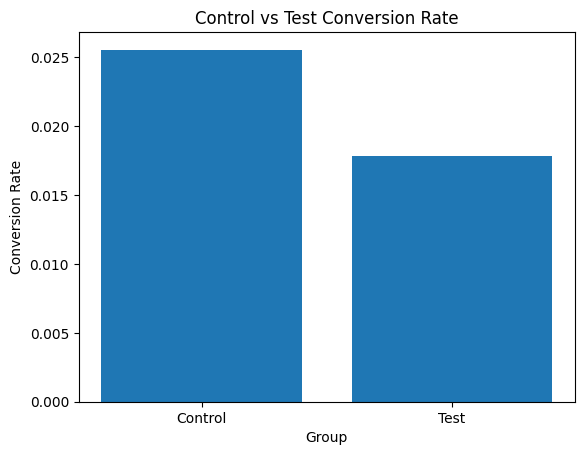

In [16]:
rates = [control_rate, test_rate]
groups = ['Control', 'Test']

plt.bar(groups, rates)
plt.xlabel('Group')
plt.ylabel('Conversion Rate')
plt.title('Control vs Test Conversion Rate')
plt.show()

In [17]:
summary = pd.DataFrame({
    'Group': ['Control', 'Test'],
    'Conversion Rate': [control_rate, test_rate]
})

summary['P-Value'] = p_value
summary.to_csv('ab_test_summary.csv', index=False)

summary

,Group,Conversion Rate,P-Value
0,Control,0.025547,1.998962e-13
1,Test,0.017854,1.998962e-13


In [18]:
with open('final_recommendation.txt', 'w') as f:
    if p_value <= alpha:
        f.write("The test version performs significantly better. Recommend implementing Test version.")
    else:
        f.write("No significant improvement observed. Recommend keeping Control version.")